CompletedProcess(args='ffplay _tmp_.wav', returncode=0)

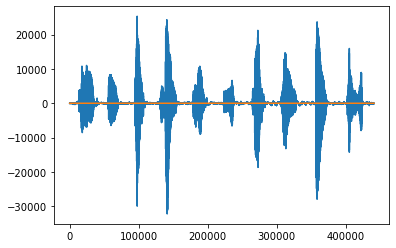

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 29 17:51:54 2021

@author: renyu
"""

import os
import subprocess

import numpy as np

import matplotlib.pyplot as pl
import scipy.io.wavfile  as wf


π= np.pi

#%%
# Generate a Wav Object
sample_rate= 10000 #samples/sec
duration= T= 1 # sec
ts= np.linspace(0,1,sample_rate)

freq= 110 #220 #440  # Hz
ys=   np.cos(ts *2 *π *freq)


# write to file for playing using outside program "ffplay.exe"

#data= ys
#rate= sample_rate 
wf.write('_tmp_.wav', sample_rate, ys)


# use outside program to play the wav

cmd= 'ffplay _tmp_.wav'
subprocess.run(cmd) # "ffplay.exe" should exist in your system

#%%
# play an exist wav file

# use outside program to play the wav

cmd= 'ffplay rySound.wav'
subprocess.run(cmd) # "ffplay.exe" should exist in your system

#%%
sample_rate, ys= wf.read('rySound.wav')

#%%
pl.plot(ys)
#%%
dataDuration= len(ys)/sample_rate  # 秒, sec
#%%

#from thinkdsp import apodize

#
# rewrite the "apodize" function in thindsp.py
# 
def apodize(ys, framerate, denom=20, duration=0.1):
    """Tapers the amplitude at the beginning and end of the signal.

    Tapers either the given duration of time or the given
    fraction of the total duration, whichever is less.

    ys: wave array
    framerate: int frames per second
    denom: float fraction of the segment to taper
    duration: float duration of the taper in seconds

    returns: wave array
    """
    
    # a fixed fraction of the segment
    n= len(ys)
    k1= n // denom

    # a fixed duration of time
    k2= int(duration * framerate)

    k=  min(k1, k2)

    w1= np.linspace(0, 1, k)
    w2= np.ones(n - 2 * k)
    w3= np.linspace(1, 0, k)

    window= np.concatenate((w1, w2, w3))
    
    # ry modified
    ys= ys*window
    ys= ys/abs(ys).max()
    
    return ys

ys= apodize(ys, sample_rate, denom= 10, duration= 1)

pl.plot(ys)

#%%

wf.write('_tmp_.wav', sample_rate, ys)

# use outside program to play the wav

cmd= 'ffplay _tmp_.wav'
subprocess.run(cmd) # "ffplay.exe" should exist in your system

#%%


http://soundfile.sapp.org/doc/WaveFormat/

![](http://soundfile.sapp.org/doc/WaveFormat/wav-sound-format.gif)


'\ndat00_10\nOut[78]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)\n\nys[0:10]\nOut[79]: array([ -3,  18,  -1, -15,   4,   6, -12,  18,   9,   2], dtype=int16)\n'

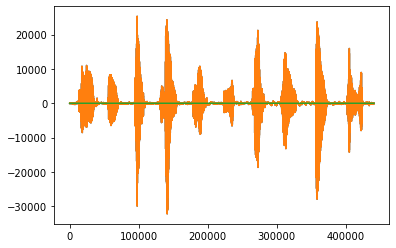

In [3]:

# -*- coding: utf-8 -*-
"""
Created on Wed Sep 29 21:02:59 2021

@author: renyu
"""


filename= 'rySound.wav'

#%%
with open(filename, mode= 'rb') as fp:
    hdr= fp.read(44)
    x1=  fp.read()

#%%
import wave

with wave.open(filename, "rb") as fp:

    nchannels= fp.getnchannels()
    nframes=   fp.getnframes()
    sampwidth= fp.getsampwidth()
    framerate= fp.getframerate()
    
    x2= fp.readframes(nframes)


#%%
import numpy as np
import matplotlib.pyplot as pl
    
ys= np.frombuffer(x2, dtype= np.int16)

pl.plot(ys)

#%%
import scipy.io.wavfile  as wf

sample_rate, ys= wf.read(filename)

pl.plot(ys)

#%%
import librosa as lb

ys1, sample_rate= lb.load(filename, sr= None)

pl.plot(ys1)

#%%

# struct — Interpret bytes as packed binary data

# https://docs.python.org/3/library/struct.html

import struct

hdr00_12=   struct.unpack('12s', hdr[ 0:12])
hdr12_36=   struct.unpack('24s', hdr[12:36])
hdr36_44=   struct.unpack('8s',  hdr[36:44])
dat00_10=   struct.unpack('10h',  x1[ 0:20])

'''
hdr12_36
Out[103]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr00_12
Out[104]: (b'RIFFtu\r\x00WAVE',)

hdr12_36
Out[105]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr36_44
Out[106]: (b'dataPu\r\x00',)

dat00_10
Out[107]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)
'''
#
# compare data0 with ys[0:10]
#
'''
dat00_10
Out[78]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)

ys[0:10]
Out[79]: array([ -3,  18,  -1, -15,   4,   6, -12,  18,   9,   2], dtype=int16)
'''

